
# Clustering       
## (voir aussi plus bas l'analyse discriminante)
Site : https://cedric.cnam.fr/vertigo/Cours/ml/tpKmeans.html

## Ce lien continet <font color="red"> plein d'autres labs (DBSCAN, RN, ....)</font>

Démarrez par la génération de cinq groupes de 100 vecteurs chacun dans l’espace 3D, chacun suivant une loi normale (de moyenne nulle et de variance unitaire). Appliquez à chaque groupe une translation différente dans l’espace, générez les étiquettes de groupe, construisez l’ensemble total de données et mélangez ensuite les lignes de cet ensemble :



In [7]:
### Pour tout afficher (san sprint)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
import numpy as np    # si pas encore fait
from sklearn.utils import shuffle


# génération 100 points 3D suivant loi normale centrée
# chaque groupe est translaté d'un vecteur [3,3,3]
d1 = np.random.randn(100,3) + [3,3,3]
d2 = np.random.randn(100,3) + [-3,-3,-3]
d3 = np.random.randn(100,3) + [-3,3,3]
d4 = np.random.randn(100,3) + [-3,-3,3]
d5 = np.random.randn(100,3) + [3,3,-3]

# génération des étiquettes de chaque groupe
c1 = np.ones(100)
c2 = 2 * np.ones(100)
c3 = 3 * np.ones(100)
c4 = 4 * np.ones(100)
c5 = 5 * np.ones(100)

# concaténation des données dans une matrice
data = np.concatenate((d1,d2,d3,d4,d5))
labels = np.concatenate((c1, c2, c3, c4, c5))
print(data.shape)
# permutation aléatoire des lignes de la matrice data
data, labels = shuffle(data, labels)

(500, 3)


Visualisez les groupes de départ :

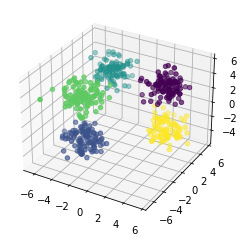

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# La couleur des points dépend de leur étiquette (label)
ax.scatter(data[:,0], data[:,1], data[:,2], c=labels)
plt.show()


### K-means :   
Appliquez la classification automatique avec K-means, d’abord avec un seul essai (une seule initialisation suivie d’une seule exécution de K-means, n_init = 1) utilisant la méthode d’initialisation k-means++ :



In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(data)

Examinez les paramètres, les attributs et les méthodes de la classe sklearn.cluster.KMeans en suivant le lien indiqué plus haut.

On peut obtenir les groupes prédits pour les données à l’aide de la méthode predict(X) :

In [12]:
pred = kmeans.predict(data)

Les groupes associés aux exemples d’apprentissage sont également stockés dans l’attribut kmeans.labels_ :

In [13]:
print(kmeans.labels_)

[4 1 3 4 2 2 0 0 2 0 2 3 3 1 0 1 1 2 3 2 0 4 3 1 3 4 3 3 0 3 0 2 4 2 0 2 0
 3 3 0 2 0 0 0 2 3 3 0 3 1 1 0 1 3 2 0 2 0 4 3 1 3 2 4 1 0 1 4 1 4 0 2 1 3
 1 4 3 1 3 1 2 0 1 2 4 1 4 2 4 4 2 4 2 2 1 2 1 1 4 1 2 3 1 4 1 1 1 4 4 2 0
 2 2 1 4 0 4 0 4 2 2 2 4 1 2 4 1 0 2 3 1 0 2 2 4 2 3 2 0 3 3 4 4 3 0 3 0 0
 3 4 0 4 4 2 4 1 3 3 0 3 1 2 3 3 2 2 0 3 0 4 3 2 2 0 0 2 1 0 3 3 0 2 1 1 0
 1 1 3 3 2 1 1 2 4 2 1 1 0 0 1 4 3 1 3 0 2 3 4 1 0 4 4 0 2 4 3 2 2 0 2 3 2
 4 0 1 3 2 2 3 0 0 4 1 1 4 1 3 4 4 1 2 2 3 4 0 2 2 3 4 3 1 1 0 3 4 0 3 3 3
 4 0 4 4 1 3 3 0 1 4 2 4 1 2 2 3 3 1 2 0 4 3 1 2 2 2 1 4 4 4 4 0 0 2 2 0 2
 0 3 1 1 2 2 1 1 4 1 4 0 1 4 1 1 4 1 3 3 3 2 1 2 3 0 0 3 4 4 3 3 1 4 1 4 1
 4 0 0 2 1 3 2 2 1 4 0 0 4 3 2 2 1 4 1 2 0 3 1 4 4 3 4 0 1 2 0 1 1 0 1 1 2
 3 3 1 3 0 4 2 4 3 3 1 4 4 3 4 4 0 0 2 3 1 2 0 3 1 4 2 0 2 1 4 1 3 2 0 0 1
 0 1 4 2 1 3 0 3 4 0 3 2 3 4 4 3 0 1 4 1 2 1 3 0 2 4 3 0 1 4 1 0 0 3 4 3 2
 3 0 3 3 0 4 3 3 2 1 4 4 0 4 0 3 4 4 0 2 0 1 4 0 4 2 1 3 0 1 0 0 4 1 0 0 2
 0 3 4 0 3 3 0 2 2 3 1 0 

Visualisez les résultats de cette classification (ZZ : preds):

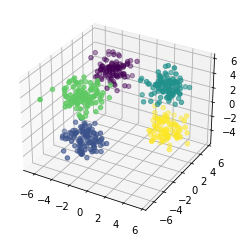

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=pred)
plt.show()

Il est possible d’évaluer la cohérence entre les groupes de départ et le partitionnement trouvé par K-means en utilisant l’indice de Rand ajusté (voir le cours et la documentation) :    
--> https://fr.wikipedia.org/wiki/Indice_de_Rand

L'indice de **Rand** est une mesure de similarité entre deux partitions d'un ensemble $E$. Il est principalement utilisé en clustering (catégorisation automatique). Son principe est de mesurer la consistance (le taux d'accord) entre deux partitions.    

Soient deux partitions ${\displaystyle \pi _{1}}$ et ${\displaystyle \pi _{2}}$ de ${\displaystyle E}$ et soient les comptages suivants:

- ${\displaystyle a}$ :  le nombre de paires d'éléments de ${\displaystyle E}$ groupés dans ${\displaystyle \pi _{1}}$ et également groupés dans ${\displaystyle \pi _{2}}$.
- ${\displaystyle b}$ : le nombre de paires d'éléments de ${\displaystyle E}$ groupés dans ${\displaystyle \pi _{1}}$ mais séparés dans ${\displaystyle \pi _{2}}$.
- ${\displaystyle c}$ : le nombre de paires d'éléments de ${\displaystyle E}$ groupés dans ${\displaystyle \pi _{2}}$ mais séparés dans ${\displaystyle \pi _{1}}$.
- ${\displaystyle d}$ : le nombre de paires d'éléments de ${\displaystyle E}$ qui sont séparés dans ${\displaystyle \pi _{1}}$ et dans ${\displaystyle \pi _{2}}$.   

La somme ${\displaystyle a+d}$ représente la **consistance** entre les deux partitions ; la somme ${\displaystyle b+c}$ représente **l’inconsistance / le désaccord** entre les deux partitions.

$\qquad \qquad \qquad \qquad$ groupés dans ${\displaystyle \pi _{2}}$   séparés ${\displaystyle \pi _{2}}$    
groupés dans ${\displaystyle \pi _{1}}$ $\qquad \qquad $  ${\displaystyle a}$ $\qquad \qquad $${\displaystyle b}$    
séparés dans ${\displaystyle \pi _{1}}$ $\qquad \qquad $ ${\displaystyle c}$ $\qquad \qquad $${\displaystyle d}$

L'Indice de Rand est défini par 
${\displaystyle RI(\pi _{1},\pi _{2})={\frac {a+d}{a+b+c+d}},}$

c'est-à-dire la proportion des paires d'éléments qui sont conjointement groupées ou conjointement séparées.




In [15]:
from sklearn import metrics
metrics.adjusted_rand_score(pred, labels)

0.9899949500767691

L’appel à _metrics.adjusted_rand_score()_ compare le partitionnement obtenu par clustering (étiquettes de groupe de pred) avec le partitionnement correspondant aux groupes définis au départ (étiquettes stockées dans labels).

Appliquez maintenant K-means avec un seul essai (n_init = 1) utilisant la méthode d’initialisation random :

In [17]:
kmeans = KMeans(n_clusters=5, n_init=1, init='random').fit(data)
metrics.adjusted_rand_score(kmeans.labels_, labels)

0.7070206260379249

**Question :**   
Répétez plusieurs fois la classification avec chacune de ces deux méthodes d’initialisation et examinez à chaque fois la cohérence des groupes obtenus avec les groupes de départ. Que constatez-vous ? Expliquez.

**Correction :**   
La cohérence est bien plus forte lorsque l’initialisation est faite par la méthode **k-means++**. Cette méthode d’initialisation mène à des résultats plus stables.

Si on emploie le paramètre par défaut _n_init = 10_ plutôt que _n_init = 1_, la variance des résultats diminue significativement, y compris pour l’initialisation _init='random'_.

**Question :**  
Variez le nombre de groupes (n_clusters) et faites plusieurs essais pour chaque valeur du nombre de groupes. Examinez de nouveau la stabilité des résultats en utilisant l’indice de Rand ajusté. Expliquez ce que vous constatez.

**Correction :**  
La cohérence est plus forte lorsque le nombre de groupes demandés à l’algorithme de classification automatique correspond au nombre de groupes « naturels » dans les données. En effet, chercher dans les données un nombre de groupes différent revient à chercher à obtenir un modèle inadapté aux données, la variance des résultats sera donc plus forte (la cohérence plus faible). Pour des données réelles, en dimension élevée (donc non directement visualisables), une bonne stabilité des résultats indique que le nombre de groupes est adapté aux données.

**Question :**    
Variez le nombre de groupes (n_clusters) entre 2 et 20, tracez le graphique d’évolution de la valeur finale atteinte par le coût (l’inertie, voir la documentation) pour chacune des valeurs de n_clusters.

**Correction :**   
Comme indiqué dans la documentation (voir lien plus haut), la valeur finale de l’inertie est à chaque fois dans kmeans.inertia_. Le graphique montre que la valeur finale atteinte par le coût diminue avec l’augmentation du nombre de groupes. Ces valeurs ne constituent donc pas une bonne mesure pour comparer des solutions avec des nombres de groupes différents. On constate également que l’inertie finale diminue fortement lorsque le nombre de groupes augmente de 1 à 5, ensuite elle diminue nettement moins vite. Cela indique aussi que chercher 5 groupes est pertinent pour ces données.

**Question :**    
Générez 500 données suivant une distribution uniforme dans $[0,1)^3$ (données tridimensionnelles dans le cube unité). Appliquez sur ces données **K-means** avec **n_clusters=5** et initialisation aléatoire (random), et examinez la stabilité des résultats en utilisant l’indice de **Rand**. Appliquez sur ces mêmes données **K-means** avec toujours **n_clusters=5** mais une initialisation **k-means++**, examinez la stabilité des résultats.     
Attention, vous ne disposez plus de groupes définis au départ ; pour définir les groupes de référence, auxquels vous comparerez ceux issus des autres classifications, vous pouvez appliquer une première fois _K-means_ avec **n_clusters=5, n_init=1, init='k-means++'**. Observez-vous des différences par rapport aux résultats obtenus sur les données générées au début de cette section (avec np.random.randn) ? Expliquez.   

**Correction :**    

In [18]:
udata = np.random.rand(500,3)
kmeans = KMeans(n_clusters=5,init='k-means++').fit(udata)
kmeans2 = KMeans(n_clusters=5,n_init=1,init='random').fit(udata)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)
kmeans2 = KMeans(n_clusters=5,n_init=1,init='random').fit(udata)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

kmeans2 = KMeans(n_clusters=5,n_init=1,init='k-means++').fit(udata)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)
kmeans2 = KMeans(n_clusters=5,n_init=1,init='k-means++').fit(udata)
metrics.adjusted_rand_score(kmeans2.labels_, kmeans.labels_)

0.4490532426068456

0.5090567560745456

0.46513998611185

0.43577537594535365

Les résultats sont plus instables qu’auparavant, et ce quelle que soit la méthode d’initialisation, alors que pour des données qui formaient des groupes bien séparés (obtenues avec np.random.randn) l’initialisation k-means++ produisait des résultats très stables (et plus stables que random). Cela s’explique par l’absence de groupes « naturels » dans ces dernières données.

## Classification avec K-means des données « textures »

Pour rappel, ces données correspondent à 5500 observations décrites par 40 variables. Chaque observation appartient à une des 11 classes de textures ; chaque classe est représentée par 500 observations. Les données sont issues de     
https://www.elen.ucl.ac.be/neural-nets/Research/Projects/ELENA/databases/REAL/texture/. 

Nous appliquerons K-means à ces données, avec n_clusters = 11, et examinerons dans quelle mesure les groupes issus de la classification automatique se rapprochent des classes présentes.

Si les données ne sont pas dans le répertoire de travail il est nécessaire de les chercher d’abord. En ligne de commande :

%%bash    (JE l'ai fait en console) :    
wget -nc http://cedric.cnam.fr/~crucianm/src/texture.dat


Mélangez les observations et appliquez K-means à ces données (attention, la dernière colonne contient les étiquettes de classe) :

In [20]:
textures = np.loadtxt('texture.dat')
np.random.shuffle(textures)
kmeans = KMeans(n_clusters=11).fit(textures[:,:40])
metrics.adjusted_rand_score(kmeans.labels_, textures[:,40])

0.46327314898042615

On constate que les groupes issus de la classification automatique ne donnent que peu d’indications sur les classes présentes dans ces données.

<font color="red"> VOIR ICI l’analyse discriminante </font>    
**Question :**    
Appliquez l’analyse discriminante à ces données et appliquez de nouveau K-means avec n_clusters = 11 aux données projetées dans l’espace discriminant. Que constatez-vous ? Expliquez. Visualisez les résultats.

**Correction :**    


In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(textures[:,:40],textures[:,40])

texturest = lda.transform(textures[:,:40])
kmeans = KMeans(n_clusters=11).fit(texturest)
metrics.adjusted_rand_score(kmeans.labels_, textures[:,40])

LinearDiscriminantAnalysis()

0.9900757931495917

La classification automatique avec K-means arrive, surtout avec une initialisation k-means++, à retrouver les classes de données. Cela indique que dans l’espace discriminant les projections des données sont très bien séparées en groupes correspondant aux classes. Bien entendu, nous avons utilisé l’appartenance des données aux différentes classes dans l’obtention de l’espace discriminant. Un tel pré-traitement a un but illustratif et n’est pas utilisable dans le cas d’une application normale de k-means. Pour la visualisation des résultats, il faut évidemment considérer les projection sur le sous-espace 3D le plus discriminant (trois premières colonnes de texturest).